# Bike Sharing Case Study

**Importing Necessary Libraries**
- Pandas , Numpy : Data Import and Handling
- Matplotlib , Seaborn : Data Visualization
- Sklean : Train-test Split , Feature Scaling , Model Evaluation , Linear Regression
- Statsmodels : OLS , Multicollinearity

In [187]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Import and Exploring Data

In [188]:
data = pd.read_csv('day.csv')
data.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [189]:
#Creating Copy
data_org = data

In [190]:
#Checking Shape
data.shape

(730, 16)

**Checking Data Quality**

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Exploring Numerical Variables**

In [192]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [193]:
#Checking Nulls
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [194]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Exploratory Data Analysis (EDA)

**Understand Numeric Variables**

- Visualize using a Pairplot to observe correlation 

- Scatter Plot to understand data points distribution

<Figure size 1600x1000 with 0 Axes>

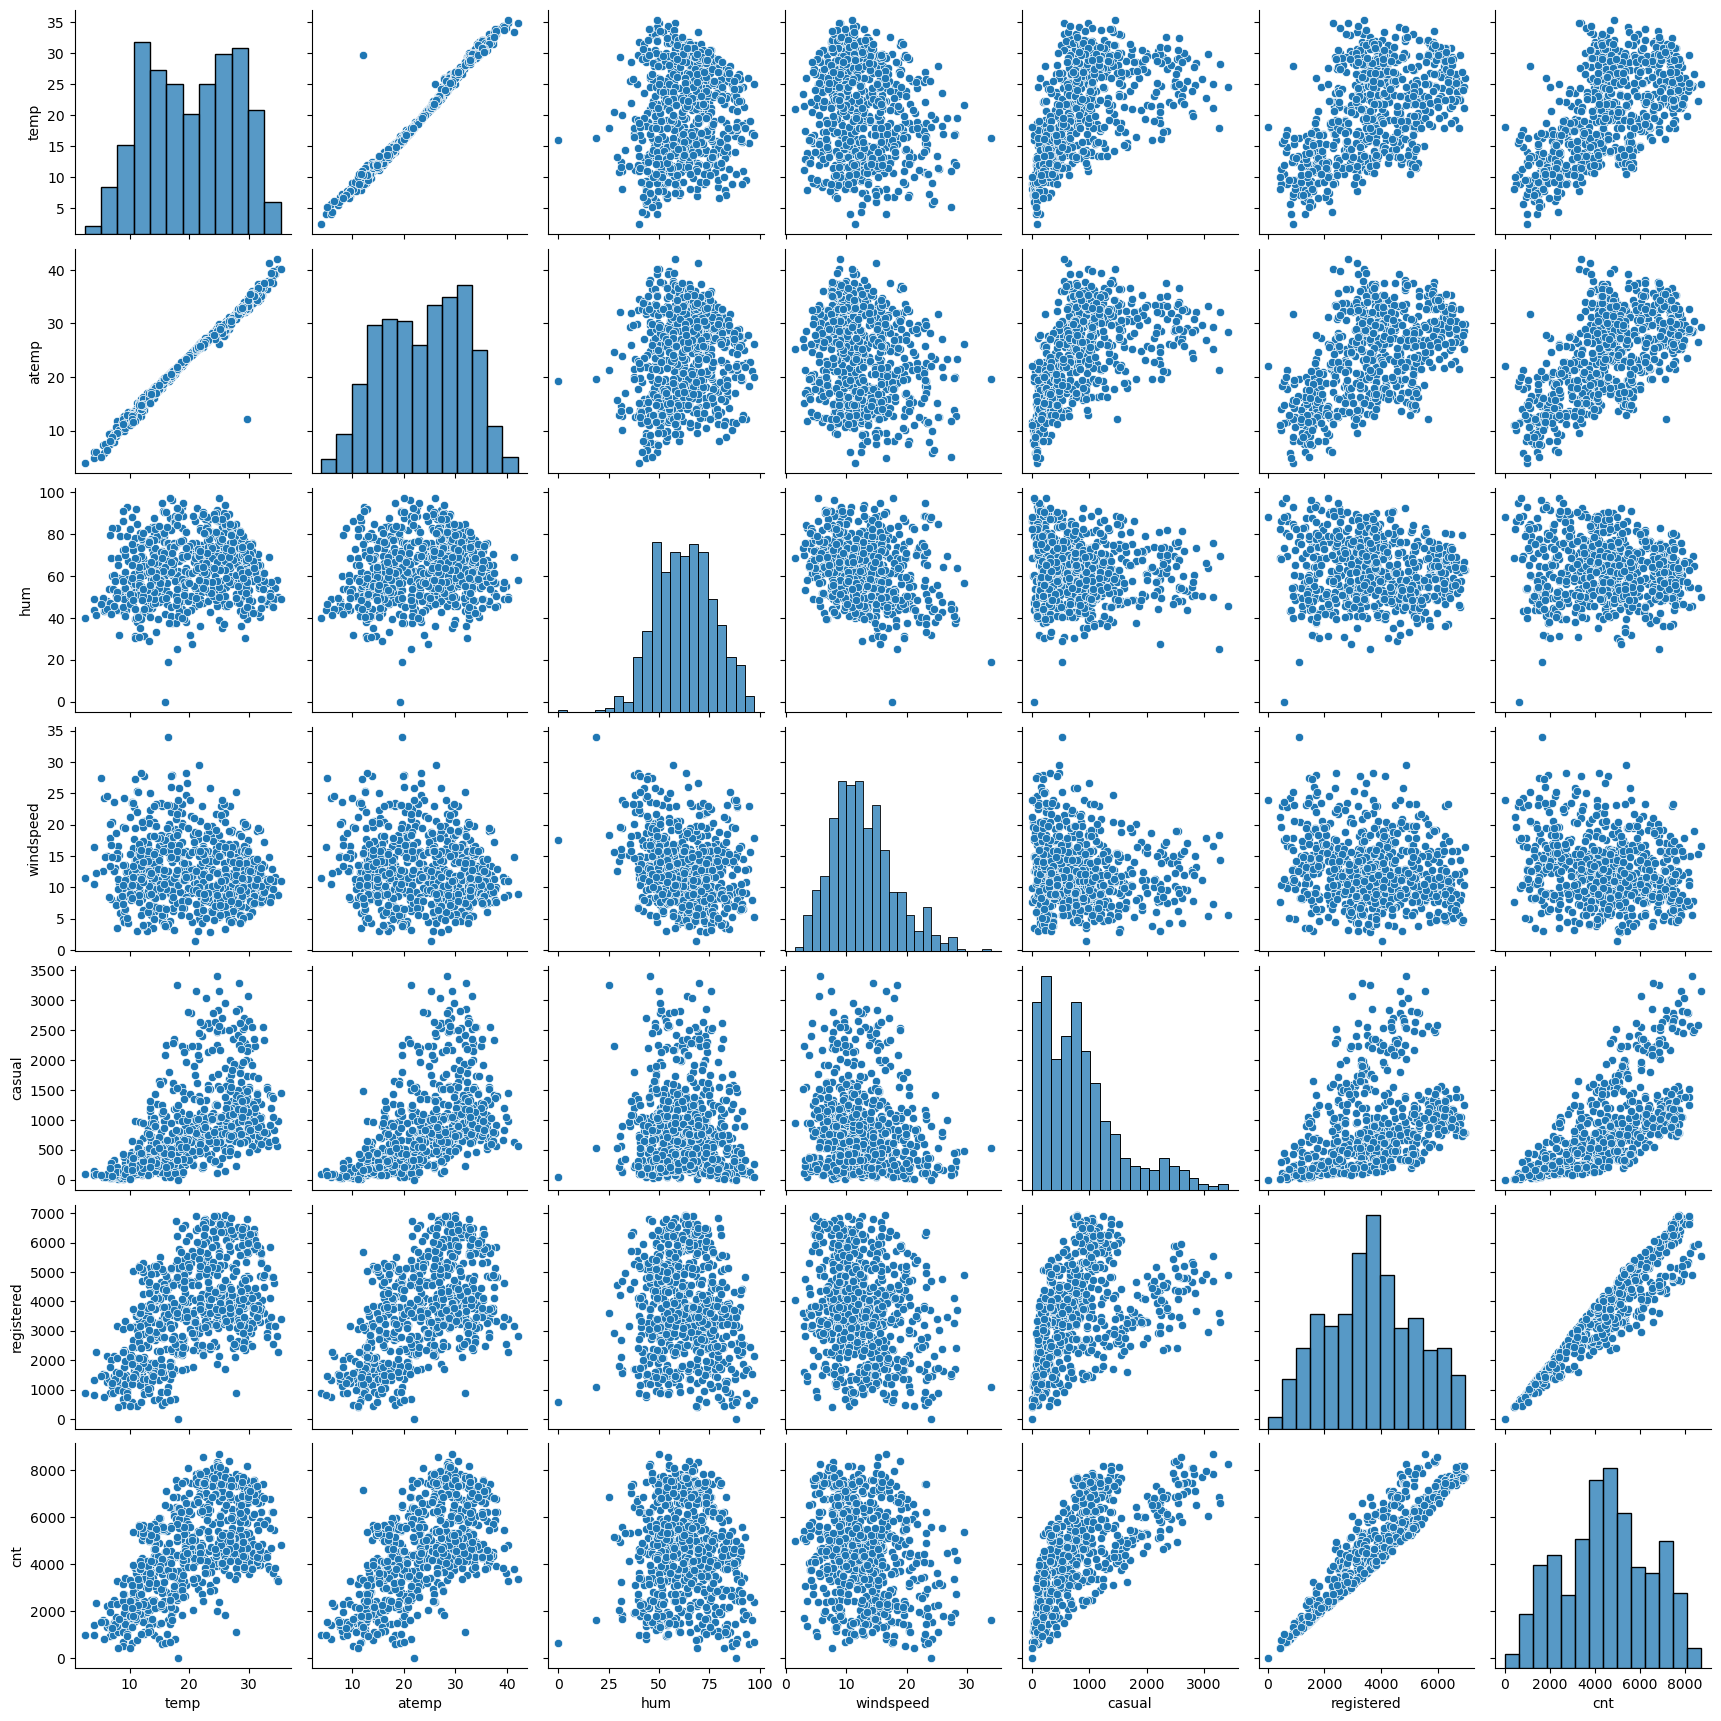

In [195]:
plt.figure(figsize=(16,10))
sns.pairplot(data[["temp","atemp","hum","windspeed","casual","registered","cnt"]])
plt.show()

**Box Plot to observe Data Composition in Numerical Variables and outliers**

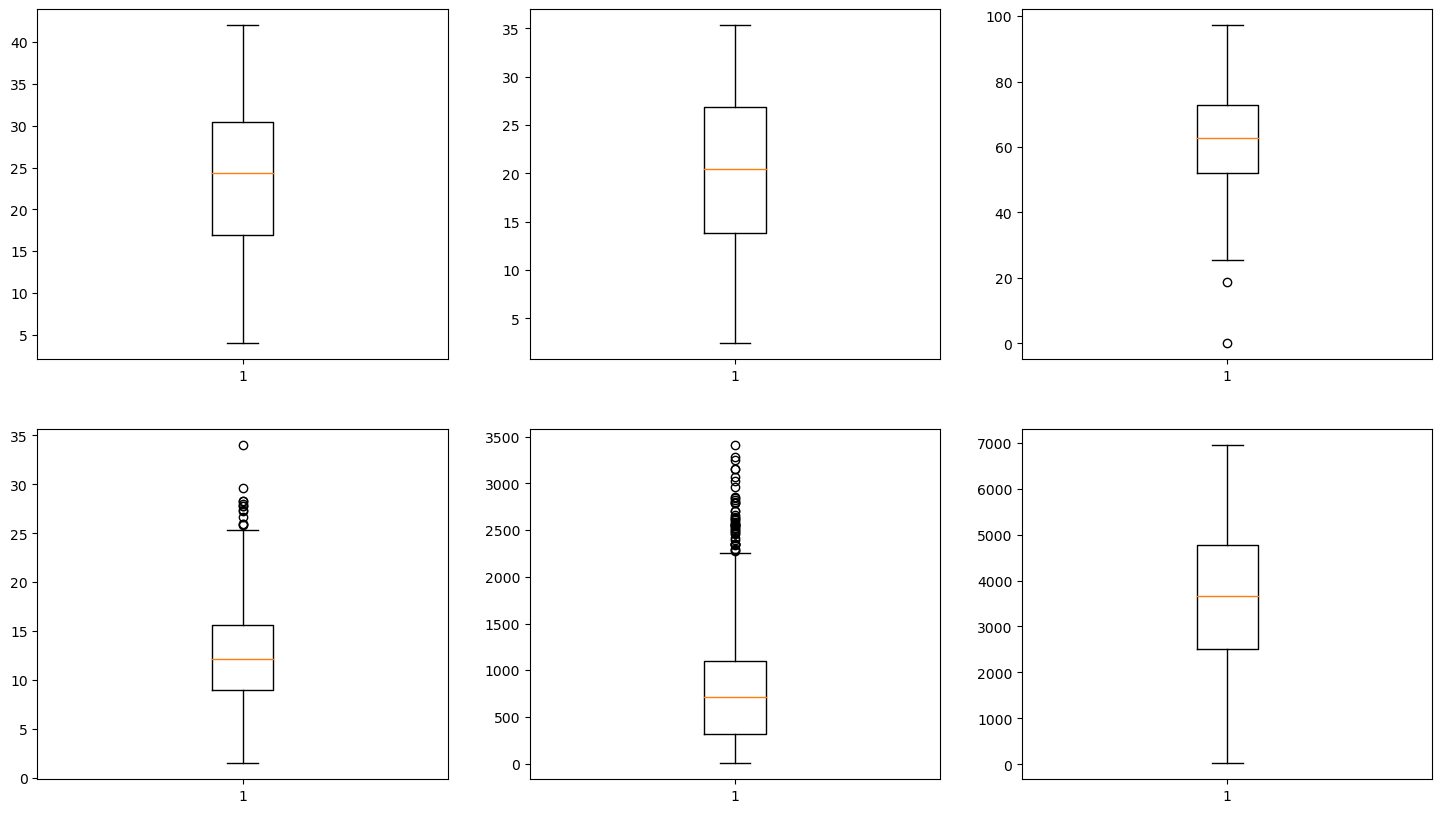

In [196]:
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
plt.boxplot(data["atemp"])
plt.subplot(2,3,2)
plt.boxplot(data["temp"])
plt.subplot(2,3,3)
plt.boxplot(data["hum"])
plt.subplot(2,3,4)
plt.boxplot(data["windspeed"])
plt.subplot(2,3,5)
plt.boxplot(data["casual"])
plt.subplot(2,3,6)
plt.boxplot(data["registered"])
plt.show()

**Understand Categorical Variables**

- Plotting Box Plot of categorical columns with Variable `cnt` to observe how they impact

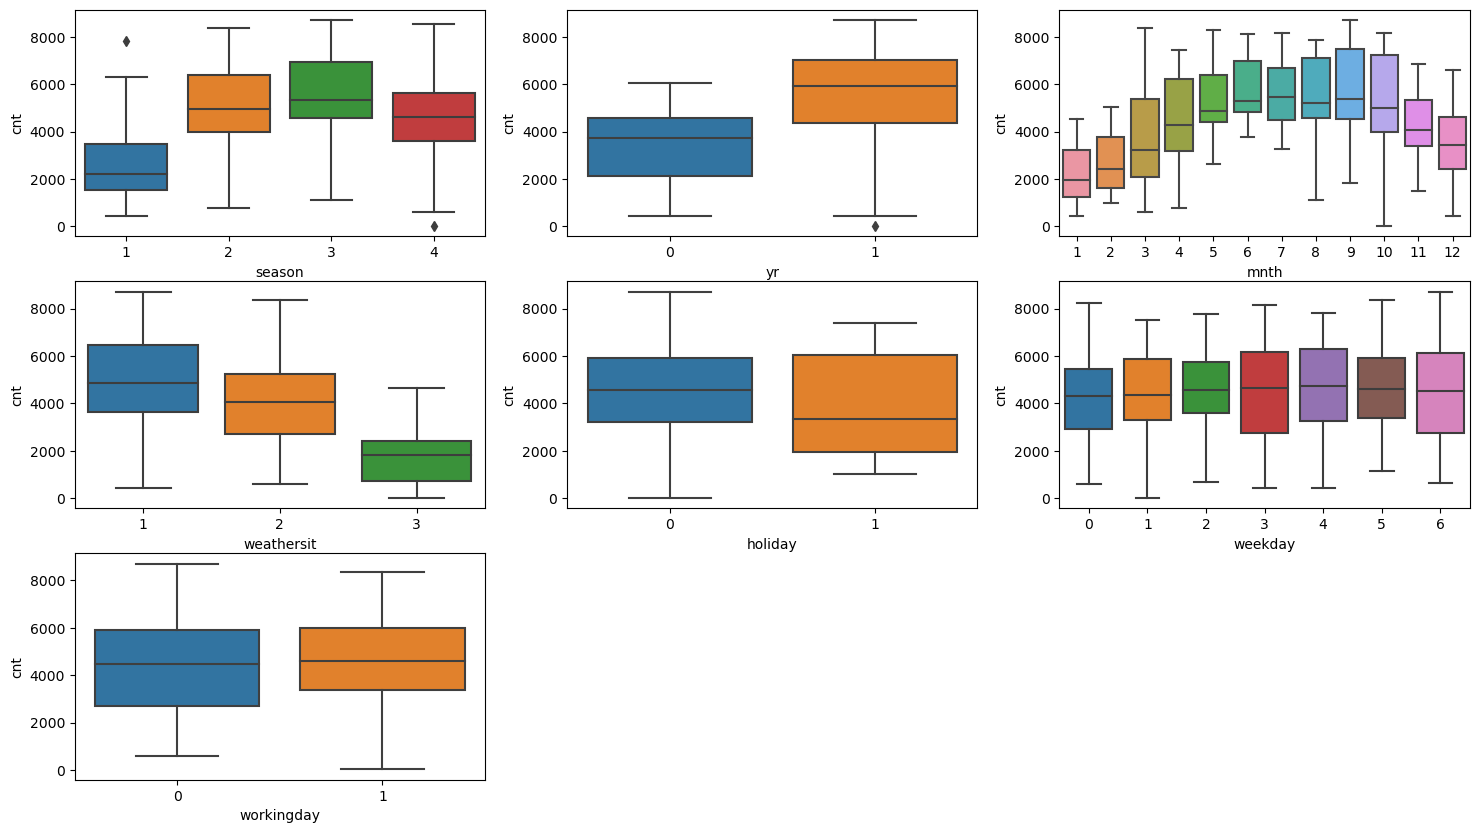

In [197]:

plt.figure(figsize=(18, 10))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.show()

**Plotting Barplot to observe trends for the Target Variable**

*Getting Monthwise Count*

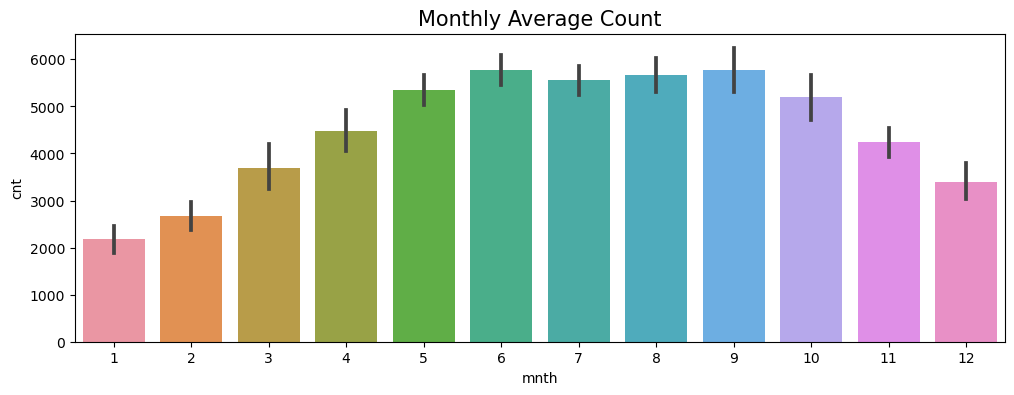

In [198]:
plt.figure(figsize=[12,4])
sns.barplot(x = data['mnth'], y = data['cnt'])
plt.title('Monthly Average Count', fontsize = 15)
plt.show()

**Insights:**

- Mid Year Months has higher Average Users
- Less People use rented Bikes in Winter Season

*Daywise Count*

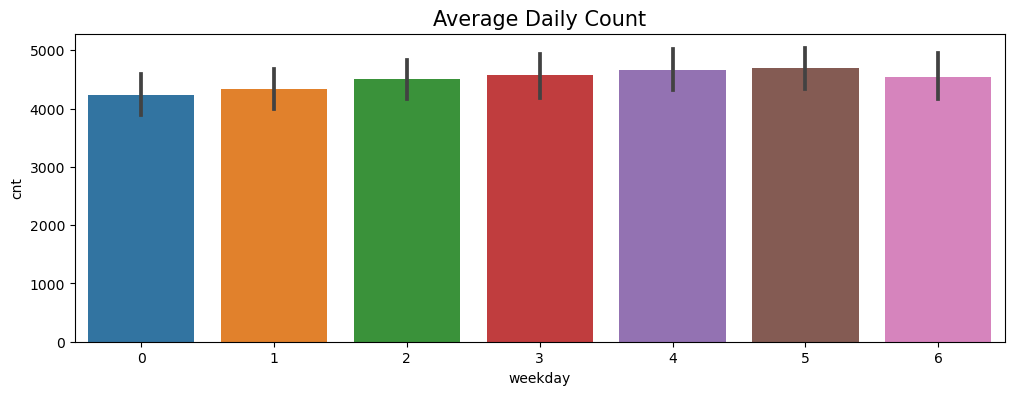

In [199]:
plt.figure(figsize=[12,4])
sns.barplot(x = data['weekday'], y = data['cnt'])
plt.title('Average Daily Count', fontsize = 15)
plt.show()

**Insights:**

- No Significant difference observed in Count on the basis of Weekday

*Average Count each year >  0:2018 , 1:2019*

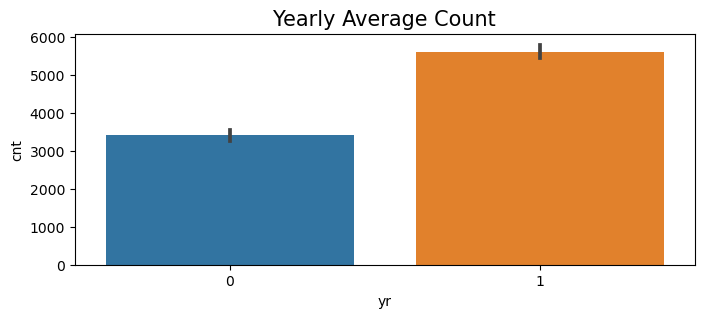

In [200]:
plt.figure(figsize=[8,3])
sns.barplot(x = data['yr'], y = data['cnt'])
plt.title('Yearly Average Count', fontsize = 15)
plt.show()

**Insights:**

- Year 2019 has fairly high Count compared to 2018

In [201]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

*Average Count on Holidays*

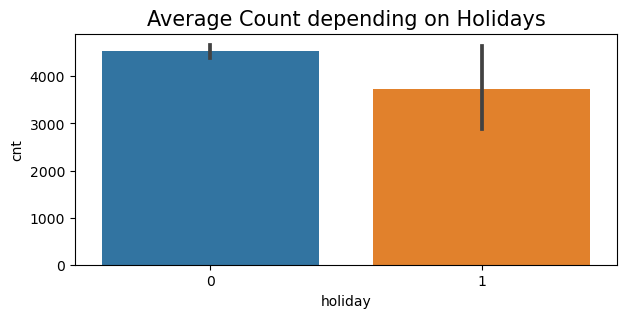

In [202]:
plt.figure(figsize=[7,3])
sns.barplot(x = data['holiday'], y = data['cnt'])
plt.title('Average Count depending on Holidays', fontsize = 15)
plt.show()

**Insights:**

- Average Number of Users are less on a Holiday

## Data Preparation

**Droping Columns**
- instant: Shows the rows index
- dteday: Redundant column , yr and mth are already available in the data
- Casual/ Registered used cannot be predicted (Also Casual+Registered=cnt)

In [203]:
data.drop(columns=["instant","dteday","casual","registered"], axis=1, inplace =True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


**Creating Dummy Variables**

In [204]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

**Column: season has 4 unique values , hence we need 3 dummy variables > use "drop_first=True"**

*Using Data Dictionary to understand column descriptions*

In [205]:
seasons = pd.get_dummies(data['season'], drop_first = True)
seasons.rename(columns={2:"season_summer", 3:"season_fall", 4:"season_winter"}, inplace=True)
seasons.head()

,season_summer,season_fall,season_winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


*Dummy Variable Interpretation:*
- 000 : Spring .
- 100 : Summer .
- 010 : Fall .
- 001 : Winter .

**weathersit Column has 3 unique values, Creating 2 dummy variables**

In [206]:
weather = pd.get_dummies(data['weathersit'], drop_first = True)
weather.rename(columns={2:"weather_mist_cloud", 3:"weather_light_snow_rain"},inplace=True)
weather.head()

,weather_mist_cloud,weather_light_snow_rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


**Creating Dummy for Holiday as a Flag**

In [207]:
holiday = pd.get_dummies(data['holiday'], drop_first = True)
holiday.rename(columns={0:'holiday_no',1:'holiday_yes'},inplace=True)
holiday.head()

,holiday_yes
0,0
1,0
2,0
3,0
4,0


**Creating Different Dummy variables for each month of the year**

In [208]:
month = pd.get_dummies(data['mnth'], drop_first = True)
month.rename(columns={1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
month.head()

,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


**Dummy Variable for the Column : year**

In [209]:
year = pd.get_dummies(data['yr'], drop_first = True)
year.rename(columns={0:'2018', 1:'2019'},inplace=True)
year.head()

,2019
0,0
1,0
2,0
3,0
4,0


**Creating Working day flag as a dummy variable**

In [210]:
workingday = pd.get_dummies(data['workingday'], drop_first = True)
workingday.rename(columns={0:'workingday_no',1:'workingday_yes'},inplace=True)
workingday.head()

,workingday_yes
0,0
1,0
2,1
3,1
4,1


**Join dummy variables with the original Data**

In [211]:
data = pd.concat([data, seasons, weather, holiday, month, year, workingday], axis=1)
data.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,June,July,Aug,Sept,Oct,Nov,Dec,2019,workingday_yes
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0


*Drop Redundant Columns as their dummy variables are created*

In [212]:
data.drop(columns=['season', 'weathersit', 'holiday', 'mnth', 'yr','workingday'], axis=1, inplace=True)
data.head(3)

,weekday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weather_mist_cloud,...,May,June,July,Aug,Sept,Oct,Nov,Dec,2019,workingday_yes
0,6,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   weekday                  730 non-null    int64  
 1   temp                     730 non-null    float64
 2   atemp                    730 non-null    float64
 3   hum                      730 non-null    float64
 4   windspeed                730 non-null    float64
 5   cnt                      730 non-null    int64  
 6   season_summer            730 non-null    uint8  
 7   season_fall              730 non-null    uint8  
 8   season_winter            730 non-null    uint8  
 9   weather_mist_cloud       730 non-null    uint8  
 10  weather_light_snow_rain  730 non-null    uint8  
 11  holiday_yes              730 non-null    uint8  
 12  Feb                      730 non-null    uint8  
 13  Mar                      730 non-null    uint8  
 14  April                    7

**Correlation Matrix using Heatmap**

*Check the correlation of Target Variable with different independent variables*

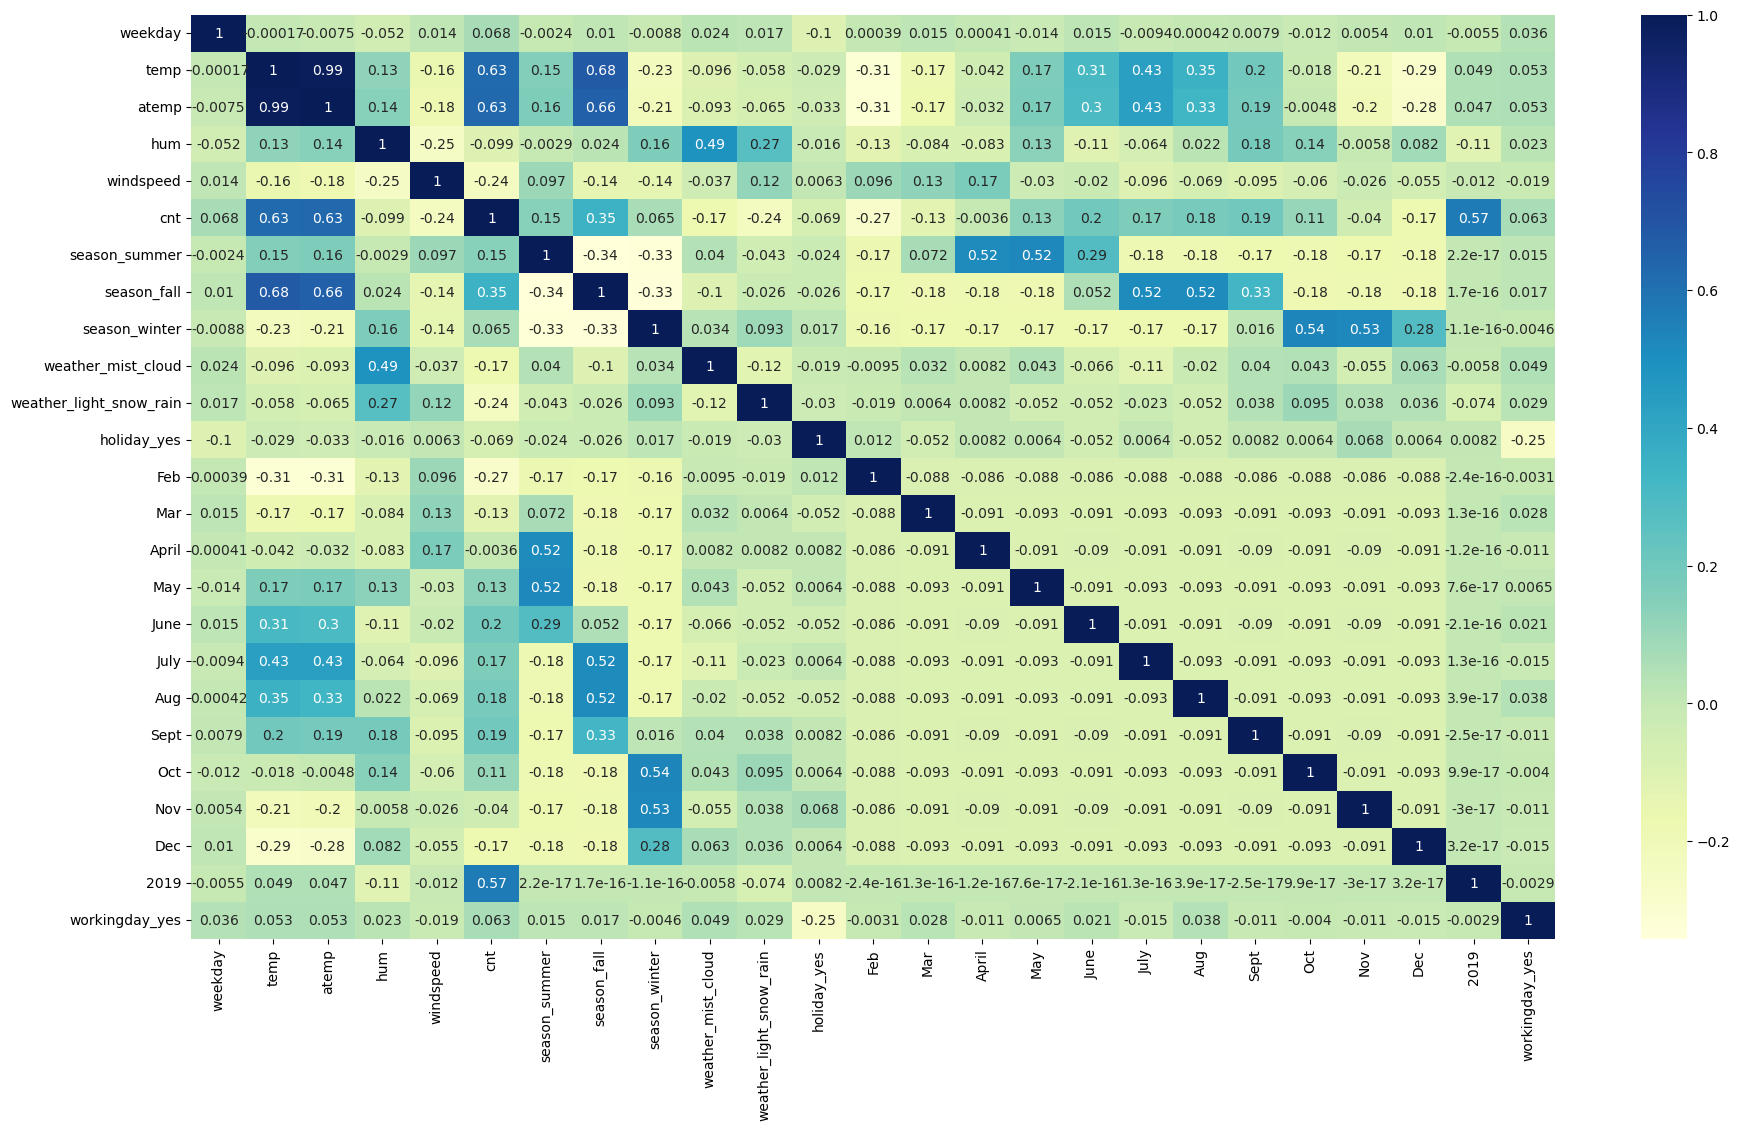

In [214]:
# data.corr()
plt.figure(figsize=(22,12))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

**Insights:**

- Column: `temp` and `atemp` have strong correlation with each other and same correlation with target column `cnt` 

- Hance, we can drop `atemp` Column

In [215]:
data.drop(columns=['atemp'], axis=1, inplace=True)

In [216]:
data.head(2)

,weekday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weather_mist_cloud,weather_light_snow_rain,...,May,June,July,Aug,Sept,Oct,Nov,Dec,2019,workingday_yes
0,6,14.110847,80.5833,10.749882,985,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,14.902598,69.6087,16.652113,801,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Train-Test Split

**Using Train-Test Split to split the data into Training Set and Test Set**

In [217]:
# import sklearn
# import statsmodels.api as sm
# from sklearn.model_selection import train_test_split

In [218]:
df=data

In [219]:
df_train, df_test = train_test_split(df, train_size=0.70, random_state=100)

In [220]:
print(df_train.shape)
print(df_test.shape)

(510, 24)
(220, 24)


### Feature Scaling

**Using MinMax Scaler**
- Min Max Scaling (Normalisation) : Between 0 and 1

In [221]:
# from sklearn.preprocessing import MinMaxScaler
# Instantiate an Object
scaler = MinMaxScaler()

In [222]:
df.columns

Index(['weekday', 'temp', 'hum', 'windspeed', 'cnt', 'season_summer',
       'season_fall', 'season_winter', 'weather_mist_cloud',
       'weather_light_snow_rain', 'holiday_yes', 'Feb', 'Mar', 'April', 'May',
       'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', '2019',
       'workingday_yes'],
      dtype='object')

*Using Fit Transform in Training Dataset*

In [223]:
n_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[n_vars] = scaler.fit_transform(df_train[n_vars])
df_train[n_vars].head()

,temp,hum,windspeed,cnt
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095


In [224]:
df.head()

,weekday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weather_mist_cloud,weather_light_snow_rain,...,May,June,July,Aug,Sept,Oct,Nov,Dec,2019,workingday_yes
0,6,14.110847,80.5833,10.749882,985,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,14.902598,69.6087,16.652113,801,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,8.200000,59.0435,10.739832,1562,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,9.305237,43.6957,12.522300,1600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Creating X and y**
- X : Independent variables used for prediction
- y : Target Variable

In [225]:
y_train = df_train.pop('cnt')
X_train = df_train

print (y_train.head())
print (X_train.head())

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64
     weekday      temp       hum  windspeed  season_summer  season_fall  \
576        2  0.815169  0.725633   0.264686              0            1   
426        6  0.442393  0.640189   0.255342              0            0   
728        0  0.245101  0.498067   0.663106              0            0   
482        6  0.395666  0.504508   0.188475              1            0   
111        5  0.345824  0.751824   0.380981              1            0   

     season_winter  weather_mist_cloud  weather_light_snow_rain  holiday_yes  \
576              0                   0                        0            0   
426              0                   1                        0            0   
728              0                   0                        0            0   
482              0                   1                        0            0   
111              0                   1     

In [226]:
X_train.head(2)

,weekday,temp,hum,windspeed,season_summer,season_fall,season_winter,weather_mist_cloud,weather_light_snow_rain,holiday_yes,...,May,June,July,Aug,Sept,Oct,Nov,Dec,2019,workingday_yes
576,2,0.815169,0.725633,0.264686,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
426,6,0.442393,0.640189,0.255342,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


**Get Linear Regression Model**

In [227]:
# Importing Linear Regression model
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression

**First: Let's Build a Linear model with all the varibales and understand the Summary Stats**

In [228]:
# Add a constant
X_train_sm = sm.add_constant(X_train)

# Create model
lr = sm.OLS(y_train, X_train_sm)

# Fit the model
lr_model = lr.fit()

# Parameters
# lr_model.params

# Summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.8
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          4.27e-185
Time:                        17:07:27   Log-Likelihood:                 526.32
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     486   BIC:                            -903.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1799      0.030      5.985      0.000       0.121       0.239
weekday                     0.0077      0.002      3.897      0.000       0.004       0.012
temp                        0.4442      0.046      9.643      0.000       0.354       0.535
hum                        -0.1505      0.038     -3.915      0.000      -0.226      -0.075
windspeed                  -0.1856      0.026     -7.234      0.000      -0.236      -0.135
season_summer               0.0882      0.024      3.748      0.000       0.042       0.134
season_fall                 0.0441      0.030      1.478      0.140      -0.015       0.103
season_winter               0.1533      0.026      5.930      0.000       0.102       0.204
weather_mist_cloud         -0.0595      0.010     -5.730      0.000      -0.080      -0.039
weather_light_snow_rain    -0.2544      0.026     -9.716      0.000      -0.306      -0.203
holiday_yes                -0.0663      0.026     -2.527      0.012      -0.118      -0.015
Feb                         0.0305      0.021      1.487      0.138      -0.010       0.071
Mar                         0.0645      0.022      2.892      0.004       0.021       0.108
April                       0.0634      0.033      1.893      0.059      -0.002       0.129
May                         0.0879      0.036      2.439      0.015       0.017       0.159
June                        0.0689      0.039      1.783      0.075      -0.007       0.145
July                        0.0303      0.044      0.695      0.488      -0.055       0.116
Aug                         0.0848      0.042      2.042      0.042       0.003       0.166
Sept                        0.1499      0.037      4.026      0.000       0.077       0.223
Oct                         0.0703      0.034      2.044      0.041       0.003       0.138
Nov                         0.0223      0.033      0.682      0.496      -0.042       0.087
Dec                         0.0182      0.026      0.689      0.491      -0.034       0.070
2019                        0.2327      0.008     28.959      0.000       0.217       0.248
workingday_yes              0.0172      0.009      1.975      0.049    9.21e-05       0.034
==============================================================================
Omnibus:                       83.370   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.417
Skew:                          -0.796   Prob(JB):                     9.24e-51
Kurtosis:                       5.882   Cond. No.                         99.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Insights:**

- R square is 0.852 : 85.2% of the variance is explained by this model
- Some Features has a high p-Value 
- We need adequate feature Selection process to get all the p-Values under the acceptable threshold of 5%

# Feature Selection

**Using Mixed Approach: 
RFE (Automated Selection) along with manual Feature selection using Business Understanding and Data Understanding**

In [229]:
X_train.columns

Index(['weekday', 'temp', 'hum', 'windspeed', 'season_summer', 'season_fall',
       'season_winter', 'weather_mist_cloud', 'weather_light_snow_rain',
       'holiday_yes', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec', '2019', 'workingday_yes'],
      dtype='object')

**Using RFE (Recursive Feature Elimination)**

*Define an object with Linear Regression*

In [230]:
lm = LinearRegression()
# Fit the Training Dataset Variables
lm.fit(X_train, y_train)

LinearRegression()

**Lets Select 15 variables**

In [231]:
rfe = RFE(lm, n_features_to_select = 15)            
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('weekday', False, 9),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('weather_mist_cloud', True, 1),
 ('weather_light_snow_rain', True, 1),
 ('holiday_yes', True, 1),
 ('Feb', False, 4),
 ('Mar', True, 1),
 ('April', False, 3),
 ('May', True, 1),
 ('June', False, 2),
 ('July', False, 5),
 ('Aug', True, 1),
 ('Sept', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 6),
 ('Dec', False, 7),
 ('2019', True, 1),
 ('workingday_yes', False, 8)]

In [232]:
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['temp', 'hum', 'windspeed', 'season_summer', 'season_fall',
       'season_winter', 'weather_mist_cloud', 'weather_light_snow_rain',
       'holiday_yes', 'Mar', 'May', 'Aug', 'Sept', 'Oct', '2019'],
      dtype='object')

**Create new Dataframe using features selected by RFE**

In [233]:
X_train_rfe = X_train[rfe_cols]
X_train_rfe.head()

,temp,hum,windspeed,season_summer,season_fall,season_winter,weather_mist_cloud,weather_light_snow_rain,holiday_yes,Mar,May,Aug,Sept,Oct,2019
576,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0,0,1
426,0.442393,0.640189,0.255342,0,0,0,1,0,0,1,0,0,0,0,1
728,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0,0,1
482,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,0,0,0,0,1
111,0.345824,0.751824,0.380981,1,0,0,1,0,0,0,0,0,0,0,0


### Steps to Build Model : 

- Add a constant as we are using statsmodels.api
- Create and fit the model
- Check Summary stats : R^2, adjusted R^2, p-Value, F-stats, etc.
- Check VIF(Variance Inflation Factor) of all the Variables
- Remove variable with high p-Value and high VIF , Use Data Underdating to remove variables 
- Re-create the model and repeat the steps till we get a Best Fit line with high R^2 and low p-Value with low VIF

# First Model 

In [234]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create and fit the model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          1.00e-188
Time:                        17:07:28   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2374      0.027      8.665      0.000       0.184       0.291
temp                        0.4869      0.034     14.119      0.000       0.419       0.555
hum                        -0.1796      0.038     -4.734      0.000      -0.254      -0.105
windspeed                  -0.1839      0.026     -7.162      0.000      -0.234      -0.133
season_summer               0.1166      0.015      7.527      0.000       0.086       0.147
season_fall                 0.0425      0.023      1.847      0.065      -0.003       0.088
season_winter               0.1530      0.014     10.801      0.000       0.125       0.181
weather_mist_cloud         -0.0542      0.010     -5.187      0.000      -0.075      -0.034
weather_light_snow_rain    -0.2429      0.026     -9.185      0.000      -0.295      -0.191
holiday_yes                -0.0889      0.025     -3.487      0.001      -0.139      -0.039
Mar                         0.0323      0.015      2.196      0.029       0.003       0.061
May                         0.0282      0.018      1.581      0.115      -0.007       0.063
Aug                         0.0509      0.017      2.913      0.004       0.017       0.085
Sept                        0.1207      0.017      6.984      0.000       0.087       0.155
Oct                         0.0407      0.018      2.314      0.021       0.006       0.075
2019                        0.2304      0.008     28.453      0.000       0.215       0.246
==============================================================================
Omnibus:                       73.210   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.011
Skew:                          -0.739   Prob(JB):                     8.15e-40
Kurtosis:                       5.507   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Create a dataframe with selected Features and their VIFs**

In [235]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [236]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,24.63
1,hum,15.53
4,season_fall,8.80
2,windspeed,3.81
3,season_summer,3.75
5,season_winter,3.11
6,weather_mist_cloud,2.15
14,2019,2.05
11,Aug,1.85
10,May,1.68


**Here, we can apply Data Understanding from EDA. We observed Column:`temp` had high Correlation with Column `cnt` (Target Variable) in Correlation Matrix**

**Hence, Begin by removing Column: `hum` due to Very High VIF**

## Second Model

In [237]:
X_train_rfe2 = X_train_rfe.drop('hum', axis = 1)

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Create and fit the model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.6
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          3.97e-185
Time:                        17:07:29   Log-Likelihood:                 502.66
No. Observations:                 510   AIC:                            -975.3
Df Residuals:                     495   BIC:                            -911.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1356      0.017      7.823      0.000       0.102       0.170
temp                        0.4530      0.034     13.147      0.000       0.385       0.521
windspeed                  -0.1498      0.025     -5.952      0.000      -0.199      -0.100
season_summer               0.1229      0.016      7.797      0.000       0.092       0.154
season_fall                 0.0554      0.023      2.373      0.018       0.010       0.101
season_winter               0.1485      0.014     10.286      0.000       0.120       0.177
weather_mist_cloud         -0.0822      0.009     -9.352      0.000      -0.099      -0.065
weather_light_snow_rain    -0.2919      0.025    -11.746      0.000      -0.341      -0.243
holiday_yes                -0.0899      0.026     -3.452      0.001      -0.141      -0.039
Mar                         0.0339      0.015      2.259      0.024       0.004       0.063
May                         0.0173      0.018      0.960      0.338      -0.018       0.053
Aug                         0.0450      0.018      2.528      0.012       0.010       0.080
Sept                        0.1101      0.018      6.293      0.000       0.076       0.145
Oct                         0.0373      0.018      2.076      0.038       0.002       0.073
2019                        0.2345      0.008     28.504      0.000       0.218       0.251
==============================================================================
Omnibus:                       72.480   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.779
Skew:                          -0.737   Prob(JB):                     6.76e-39
Kurtosis:                       5.470   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [238]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,16.00
3,season_fall,8.42
2,season_summer,3.70
1,windspeed,3.46
4,season_winter,2.94
13,2019,2.04
10,Aug,1.85
9,May,1.67
12,Oct,1.61
5,weather_mist_cloud,1.51


**Removing `May` Column due to high p-Value**

## Third Model

In [239]:
X_train_rfe3 = X_train_rfe2.drop('May', axis = 1)

# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Create and fit the model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          4.39e-186
Time:                        17:07:29   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     496   BIC:                            -917.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1351      0.017      7.799      0.000       0.101       0.169
temp                        0.4599      0.034     13.651      0.000       0.394       0.526
windspeed                  -0.1519      0.025     -6.060      0.000      -0.201      -0.103
season_summer               0.1264      0.015      8.249      0.000       0.096       0.157
season_fall                 0.0510      0.023      2.230      0.026       0.006       0.096
season_winter               0.1468      0.014     10.245      0.000       0.119       0.175
weather_mist_cloud         -0.0816      0.009     -9.307      0.000      -0.099      -0.064
weather_light_snow_rain    -0.2919      0.025    -11.746      0.000      -0.341      -0.243
holiday_yes                -0.0906      0.026     -3.480      0.001      -0.142      -0.039
Mar                         0.0312      0.015      2.115      0.035       0.002       0.060
Aug                         0.0449      0.018      2.522      0.012       0.010       0.080
Sept                        0.1101      0.018      6.292      0.000       0.076       0.144
Oct                         0.0365      0.018      2.033      0.043       0.001       0.072
2019                        0.2340      0.008     28.506      0.000       0.218       0.250
==============================================================================
Omnibus:                       70.952   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.536
Skew:                          -0.733   Prob(JB):                     6.87e-37
Kurtosis:                       5.385   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [240]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,15.10
3,season_fall,8.11
2,season_summer,3.49
1,windspeed,3.40
4,season_winter,2.89
12,2019,2.03
9,Aug,1.85
11,Oct,1.61
5,weather_mist_cloud,1.50
10,Sept,1.49


**Dropping `Oct` Column due to high p-Value**

## Fourth Model

In [241]:
X_train_rfe4 = X_train_rfe3.drop('Oct', axis = 1)

# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Create and fit the model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.3
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          2.29e-186
Time:                        17:07:30   Log-Likelihood:                 500.07
No. Observations:                 510   AIC:                            -974.1
Df Residuals:                     497   BIC:                            -919.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1297      0.017      7.554      0.000       0.096       0.163
temp                        0.4758      0.033     14.469      0.000       0.411       0.540
windspeed                  -0.1500      0.025     -5.970      0.000      -0.199      -0.101
season_summer               0.1218      0.015      8.010      0.000       0.092       0.152
season_fall                 0.0445      0.023      1.956      0.051      -0.000       0.089
season_winter               0.1569      0.013     11.625      0.000       0.130       0.183
weather_mist_cloud         -0.0807      0.009     -9.187      0.000      -0.098      -0.063
weather_light_snow_rain    -0.2856      0.025    -11.546      0.000      -0.334      -0.237
holiday_yes                -0.0920      0.026     -3.525      0.000      -0.143      -0.041
Mar                         0.0306      0.015      2.071      0.039       0.002       0.060
Aug                         0.0436      0.018      2.441      0.015       0.009       0.079
Sept                        0.1066      0.017      6.101      0.000       0.072       0.141
2019                        0.2334      0.008     28.365      0.000       0.217       0.250
==============================================================================
Omnibus:                       61.266   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.203
Skew:                          -0.664   Prob(JB):                     1.19e-29
Kurtosis:                       5.123   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,14.62
3,season_fall,8.00
2,season_summer,3.43
1,windspeed,3.39
4,season_winter,2.59
11,2019,2.02
9,Aug,1.85
5,weather_mist_cloud,1.50
10,Sept,1.48
8,Mar,1.25


**Dropping `Mar` Column Due to high p-Value**

## Fifth Model

In [243]:
X_train_rfe5 = X_train_rfe4.drop('Mar', axis = 1)

# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe5)

# Create and fit the model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.6
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          1.24e-186
Time:                        17:07:30   Log-Likelihood:                 497.87
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     498   BIC:                            -920.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1359      0.017      8.005      0.000       0.103       0.169
temp                        0.4786      0.033     14.519      0.000       0.414       0.543
windspeed                  -0.1471      0.025     -5.844      0.000      -0.197      -0.098
season_summer               0.1174      0.015      7.772      0.000       0.088       0.147
season_fall                 0.0352      0.022      1.575      0.116      -0.009       0.079
season_winter               0.1487      0.013     11.487      0.000       0.123       0.174
weather_mist_cloud         -0.0808      0.009     -9.178      0.000      -0.098      -0.064
weather_light_snow_rain    -0.2834      0.025    -11.432      0.000      -0.332      -0.235
holiday_yes                -0.0955      0.026     -3.654      0.000      -0.147      -0.044
Aug                         0.0437      0.018      2.440      0.015       0.009       0.079
Sept                        0.1069      0.018      6.100      0.000       0.072       0.141
2019                        0.2334      0.008     28.275      0.000       0.217       0.250
==============================================================================
Omnibus:                       59.622   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.378
Skew:                          -0.631   Prob(JB):                     2.43e-30
Kurtosis:                       5.197   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,14.17
3,season_fall,7.58
2,season_summer,3.35
1,windspeed,3.27
4,season_winter,2.41
10,2019,2.02
8,Aug,1.85
5,weather_mist_cloud,1.50
9,Sept,1.48
6,weather_light_snow_rain,1.08


**Drop Column:`season_fall` due to high p-Value**

## Model Six

In [245]:
X_train_rfe6 = X_train_rfe5.drop('season_fall', axis = 1)

# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe6)

# Create and fit the model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          2.62e-187
Time:                        17:07:30   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1307      0.017      7.837      0.000       0.098       0.163
temp                        0.5173      0.022     23.546      0.000       0.474       0.561
windspeed                  -0.1497      0.025     -5.950      0.000      -0.199      -0.100
season_summer               0.1012      0.011      9.116      0.000       0.079       0.123
season_winter               0.1371      0.011     12.843      0.000       0.116       0.158
weather_mist_cloud         -0.0811      0.009     -9.200      0.000      -0.098      -0.064
weather_light_snow_rain    -0.2819      0.025    -11.361      0.000      -0.331      -0.233
holiday_yes                -0.0966      0.026     -3.692      0.000      -0.148      -0.045
Aug                         0.0541      0.017      3.249      0.001       0.021       0.087
Sept                        0.1163      0.017      7.046      0.000       0.084       0.149
2019                        0.2326      0.008     28.191      0.000       0.216       0.249
==============================================================================
Omnibus:                       55.243   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.255
Skew:                          -0.606   Prob(JB):                     1.27e-26
Kurtosis:                       5.036   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.01
1,windspeed,3.10
9,2019,2.00
2,season_summer,1.82
7,Aug,1.58
4,weather_mist_cloud,1.49
3,season_winter,1.48
8,Sept,1.31
5,weather_light_snow_rain,1.08
6,holiday_yes,1.04


**Insights:**

- Here We See VIF of Column:temp has come down to near 5 along with all other features having VIF under 4
- The p-Value for all the selected features are also very low
- This indicates the Feature Selection process has performed well 

# Model Selection / Feature Selection Review

**Model Selection**

We select Model Six due to following reason:
- Model Six has R square of 0.834 i.e 83.4% and adjusted R square of 83.1%
- All the p-Values are very low for Model Six
- VIF for all the dependent Variables are under the acceptable Range

### Equation Based on Selected Model:
    
_cnt = 0.1307 + (temp * 0.5173) - (windspeed * 0.1497) + (season_summer * 0.1012) + (season_winter * 0.1371)
        - (weather_mist_cloud * 0.0811) - (weather_light_snow_rain * 0.2819) - (holiday_yes * 0.0966)
        + (Aug * 0.0541) + (Sept * 0.1163) + (2019 * 0.2326)_

**Coefficient Interpretation**

- constant : The bike demands increase by 0.1307 units when all other variables are not present

- Others : x units of increase in the given variable will increase the bike demands by x units 

- Example: 0.5173 units of increase in temp Variable will increase the bike demands by 0.5173 units


## Residual Analysis

**Assumption: Error are Normally Distrubuted with mean of 0**

*Getting Predicted Variable*

In [247]:
y_train_pred = lr6.predict(X_train_lm6)

*Residual Calculation*

In [248]:
res = y_train - y_train_pred

*Plot Histogram*

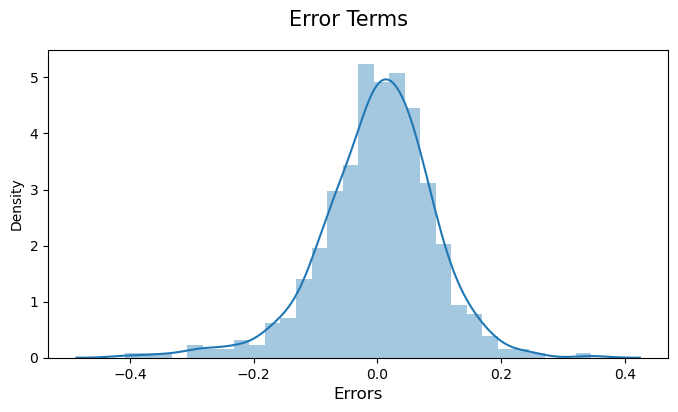

In [249]:
fig = plt.figure(figsize=[8,4])
sns.distplot((res), bins = 30)
fig.suptitle('Error Terms', fontsize = 15)    
plt.xlabel('Errors', fontsize = 12)
plt.show()

**Insights:**

- The Residuals are Normally Distributed. This indicated our Assumptions are right

**Check for Homoscedasticity**

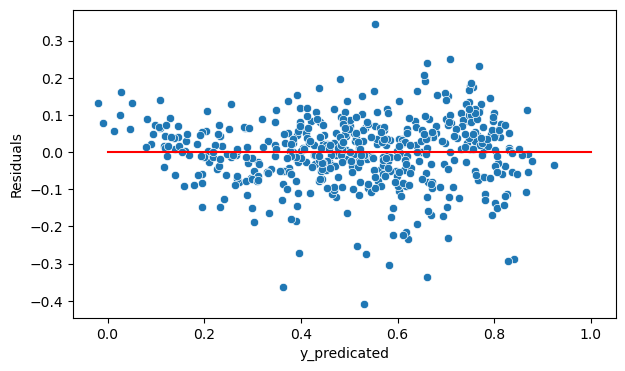

In [250]:
plt.figure(figsize = [7,4])
d = sns.scatterplot(x = y_train_pred, y = res)
plt.xlabel('y_predicated')
plt.ylabel('Residuals')

#Getting Mean Line at 0
d = sns.lineplot(x = [0,1], y = [0,0],color='red')

**Insights:**

- Residuals have equal variance along the Regression Line

## Prediction and Evaluation

**Use only Transform method on Test data**

In [251]:
df_test[n_vars] = scaler.transform(df_test[n_vars])
df_test.head()

,weekday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weather_mist_cloud,weather_light_snow_rain,...,May,June,July,Aug,Sept,Oct,Nov,Dec,2019,workingday_yes
184,1,0.831783,0.657364,0.084219,0.692706,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
535,3,0.901354,0.610133,0.153728,0.712034,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
299,4,0.511964,0.837699,0.334206,0.303382,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
221,3,0.881625,0.437098,0.339570,0.547400,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
152,4,0.817246,0.314298,0.537414,0.569029,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [252]:
df_test.describe()

,weekday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weather_mist_cloud,weather_light_snow_rain,...,May,June,July,Aug,Sept,Oct,Nov,Dec,2019,workingday_yes
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,3.013636,0.558718,0.638221,0.313293,0.522154,0.263636,0.245455,0.236364,0.318182,0.027273,...,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364,0.481818,0.700000
std,1.985057,0.233187,0.148694,0.159584,0.219163,0.441609,0.431338,0.425817,0.466833,0.163248,...,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541,0.500809,0.459303
min,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,0.755981,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Get Test Data Variables**

In [253]:
y_test = df_test.pop('cnt')
X_test = df_test

print(y_test.shape)
print(X_test.shape)

(220,)
(220, 23)


*Get Predictor Columns*

In [254]:
X_train_rfe6.columns

Index(['temp', 'windspeed', 'season_summer', 'season_winter',
       'weather_mist_cloud', 'weather_light_snow_rain', 'holiday_yes', 'Aug',
       'Sept', '2019'],
      dtype='object')

In [255]:
cols = X_train_rfe6.columns

X_test = X_test[cols]

**Adding constant variable to test Dataframe**

In [256]:
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.head()

,const,temp,windspeed,season_summer,season_winter,weather_mist_cloud,weather_light_snow_rain,holiday_yes,Aug,Sept,2019
184,1.0,0.831783,0.084219,0,0,1,0,1,0,0,0
535,1.0,0.901354,0.153728,1,0,0,0,0,0,0,1
299,1.0,0.511964,0.334206,0,1,1,0,0,0,0,0
221,1.0,0.881625,0.339570,0,0,0,0,0,1,0,0
152,1.0,0.817246,0.537414,1,0,0,0,0,0,0,0


### Making Model Prediction

In [257]:
y_test_pred = lr6.predict(X_test_lm6)
y_test_pred.head(2)

184    0.370711
535    0.907790
dtype: float64

### Model Evaluation

**Plot test and Predicted variable in a Regression Plot to undertand how Test Data Values are related with the Predicted line**

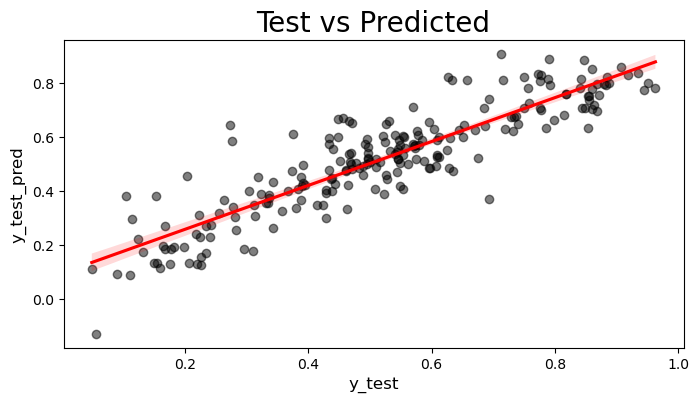

In [258]:
plt.figure(figsize = (8,4))
sns.regplot(x = y_test, y = y_test_pred, scatter_kws = {"color": "black", "alpha": 0.5}, line_kws = {"color": "red"})
plt.title('Test vs Predicted', fontsize = 20)
plt.xlabel('y_test', fontsize = 12)                         
plt.ylabel('y_test_pred', fontsize = 12) 
plt.show()

**Insights:**

- The Test Dataset Values are in Linear trend with Predicted Values

### Checking Evaluation Metrics

#### Check R^2 Value

- Understand the percentage of Variance taken care by the Model

In [259]:
r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 79.35
Train data r^2 : 83.39


**Check Adjusted R square**

In [260]:
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

print('Adjusted R^2 value:', round((adjusted_r2_test*100),2))

Adjusted R^2 value: 78.36


- Adjusted R^2 of Training Data Set : 83.1

### Selected Model has below Metrics :

- Test data r^2 : 79.35
- Train data r^2 : 83.39
- Adjusted Test Data R^2 value: 78.36
- Adjusted Training Data R^2 value : 83.1

### Conclusion:

**The Demand of Boombikes can be predicted best using the below equation**

_cnt = 0.1307 + (temp * 0.5173) - (windspeed * 0.1497) + (season_summer * 0.1012) + (season_winter * 0.1371)
        - (weather_mist_cloud * 0.0811) - (weather_light_snow_rain * 0.2819) - (holiday_yes * 0.0966)
        + (Aug * 0.0541) + (Sept * 0.1163) + (2019 * 0.2326)_

### The Variables Selected for above Model Prediction are:

- temp : Temperature in Celsius
- windspeed : Wind Speed
- season_summer : Summer Season 
- season_winter : Winter Season
- weather_mist_cloud : Weather Condition > Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- weather_light_snow_rain : Weather Condition > Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- holiday_yes : Is a Holiday Flag
- Aug : Month of August
- Sept : Month of September
- 2019 : Flag for Year 2019 

### Footnote


                                                                                     >>Author : Alpesh Kumar
                                                                                     >>Email  : kumaralpesh0695@gmial.com
                                                                                    